📊 **Sales Revenue Analysis**!

Author: Alekhya

Tools Used: Python, Pandas, Matplotlib

🎯 **Objective**

*To analyze transactional sales data and identify revenue trends across products, cities, sales channels, and managers.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/9. Sales-Data-Analysis.csv')

In [3]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [5]:
df.describe(include='all')

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
count,254.000000,254,254,254.000000,254.000000,254,254,254,254
unique,NaN,53,5,NaN,NaN,3,3,14,5
top,NaN,09-11-2022,Chicken Sandwiches,NaN,NaN,Online,Credit Card,Tom Jackson,London
freq,NaN,5,52,NaN,NaN,107,120,74,75
mean,10584.133858,NaN,NaN,7.102323,460.611457,NaN,NaN,NaN,NaN
std,75.889181,NaN,NaN,4.341855,214.888699,NaN,NaN,NaN,NaN
min,10452.000000,NaN,NaN,2.950000,200.400000,NaN,NaN,NaN,NaN
25%,10520.250000,NaN,NaN,3.490000,201.010000,NaN,NaN,NaN,NaN
50%,10583.500000,NaN,NaN,4.990000,538.880000,NaN,NaN,NaN,NaN
75%,10649.750000,NaN,NaN,9.950000,677.440000,NaN,NaN,NaN,NaN


In [6]:
df=df.drop_duplicates()

In [7]:
#data cleaning
df.isnull().sum()
df=df.dropna()

In [8]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [9]:
df['Revenue']=df['Price']*df['Quantity']
#adding new column called "Revenue"

In [10]:
#calculate total revenue
total_revenue=df['Revenue'].sum()
print("Total Revenue:", round(total_revenue,2))

Total Revenue: 769515.86


In [15]:
#calculate total unique orders
total_orders=df['Order ID'].nunique()
print("Total Orders:",total_orders)

Total Orders: 254


In [16]:
#extract month from date column
df['Month']=df['Date'].dt.month
monthly_revenue=df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)
print(monthly_revenue)

Month
12    437401.2008
11    332114.6584
Name: Revenue, dtype: float64


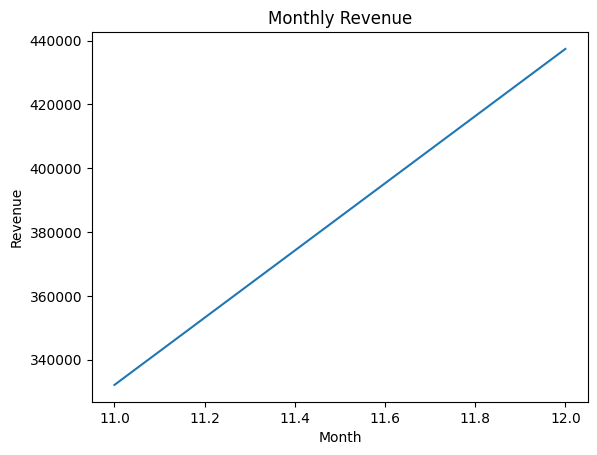

In [17]:
# Calculate monthly revenue
monthly_revenue.sort_index().plot(kind='line')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [19]:
# Revenue by product
product_revenue=df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print(product_revenue)

Product
Burgers               376999.8069
Fries                 125674.2903
Chicken Sandwiches    114641.6950
Beverages             103200.2630
Sides & Other          48999.8040
Name: Revenue, dtype: float64


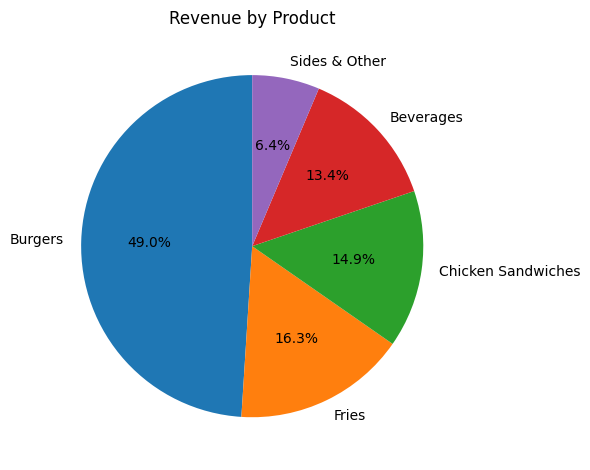

In [27]:
product_revenue.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title("Revenue by Product")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [20]:
# Revenue by Quantity
top_quantity=df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print(top_quantity)

Product
Beverages             34983.14
Fries                 32034.34
Burgers               29022.31
Chicken Sandwiches    11135.92
Sides & Other          9819.60
Name: Quantity, dtype: float64


In [22]:
# Revenue by city
city_revenue=df.groupby('City')['Revenue'].sum().sort_values(ascending=False)
print(city_revenue)

City
Lisbon    241714.1157
London    211201.0406
Madrid    136200.2665
Berlin    100600.1313
Paris      79800.3051
Name: Revenue, dtype: float64


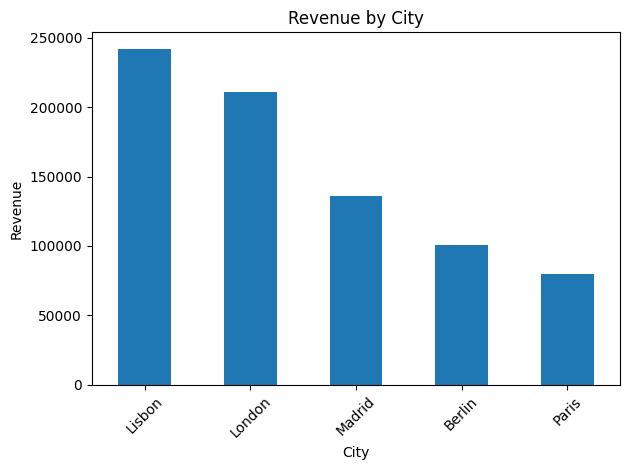

In [28]:
# Plot Revenue by City
city_revenue.plot(kind='bar')

plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Revenue by purchase type (Online vs In-store)
purchase_revenue=df.groupby('Purchase Type')['Revenue'].sum()
print(purchase_revenue)

Purchase Type
Drive-thru     178600.4730
In-store       285713.9994
Online         305201.3868
Name: Revenue, dtype: float64


In [24]:
#payment mode online vs offline
payment_count=df['Payment Method'].value_counts()
print(payment_count)

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64


In [26]:
# Revenue handled by each manager
manager_revenue=df.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)
print(manager_revenue)

Manager
Joao Silva            225074.7665
Tom Jackson           209201.0263
Pablo Perez           107600.2549
Walter Muller         100600.1313
Remy Monet             72800.2690
       Pablo Perez     23200.0330
Joao    Silva          16639.3492
       Remy Monet       4000.0258
Pablo  Perez            2199.9913
Pablo   Perez           2199.9913
Tom      Jackson        2000.0143
Remy    Monet           2000.0143
Pablo    Perez           999.9960
Remy     Monet           999.9960
Name: Revenue, dtype: float64


📊** Key Insights**

 Revenue shows seasonal fluctuations with peak sales in certain months.

 A small number of products contribute the majority of total revenue.

 Sales performance varies significantly across different cities.

 Business performance is influenced by product demand, seasonality, and regional factors.

 Data-driven strategies can improve inventory planning and regional marketing.





**Key Performance Indicators**


*  Total Revenue
*  Total Orders
*  Monthly Revenue Trend
*  Top Revenue-Generating Products
*  City-wise Revenue Contribution






📌 **Conclusion**

The company should focus on top-performing products.

Seasonal planning and targeted regional strategies can increase overall profitability.